# svgを読み込んでべジェカーブをプロットする

enokoro_function。狗尾さんのファンアート...というかべジェカーブ芸。  

In [1]:
from PIL import Image
from PIL import ImageDraw
import numpy as np
from matplotlib import pyplot as plt

import math

べジェカーブをscatterでプロットする  
点の間隔は開始点と終着点の長さの0.1倍  

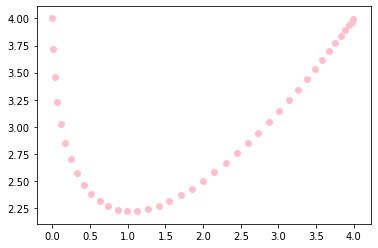

In [2]:
def pltVeg(SP,EP,P_1="N",P_2="N",color="pink"):
    PN=int(((SP[0]-EP[0])**2+(SP[1]-EP[1])**2)**0.5*10)
    SP=np.array(SP)
    EP=np.array(EP)
    if P_1=="N":
        P_1=EP
    P_1=np.array(P_1)
    
    if P_2=="N":
        P_2=EP
    P_2=np.array(P_2)

    B_s1=[(1-t/PN)*SP+t/PN*P_1 for t in range(PN)]
    B_12=[(1-t/PN)*P_1+t/PN*P_2 for t in range(PN)]
    B_s12=[B_s1[t]*(1-t/PN)+B_12[t]*(t/PN) for t in range(PN)]

    B_2e=[(1-t/PN)*P_2+t/PN*EP for t in range(PN)]
    B_12e=[B_12[t]*(1-t/PN)+B_2e[t]*(t/PN) for t in range(PN)]

    B_s12e=[B_s12[t]*(1-t/PN)+B_12e[t]*(t/PN) for t in range(PN)]

    for i in B_s12e:
        plt.scatter(i[0],i[1],color=color)

SP=[0,4]
EP=[4,0]
P_1=[0,0]
P_2=[4,4]
pltVeg(SP,P_2,P_1)

svg読み込み。svgファイルとしてそのまま読み込み

In [3]:
f=open("enokoro.svg","r")
file=f.readlines()
f.close()
path=file[2].split("<path")

splitして数値もってきて処理して全部プロット

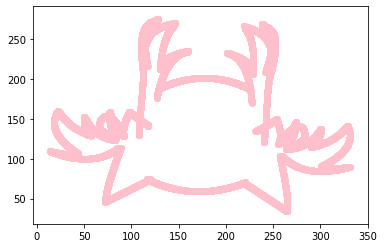

In [4]:
StPos=[0,0]
for t in range(1,len(path)):
    #print(t)
    S=path[t].split('"')[1]
    #print(S)
    D=""
    H=[]   

    N=[]
    St=0
    for i in range(len(S)):
        if S[i]=="M" or S[i]=="L" or S[i]=="C" or S[i]==" ":
            D+=S[i]
            if(St!=0):
                N.append(float(S[St:i]))
            St=i+1
    if S!="":
        N.append(float(S[St:i+1]))

    St=0
    #print(D)
    for p in D:
        if p=="M":
            StPos=[N[St],N[St+1]]
            St+=2
        if p=="L":
            pltVeg(StPos,N[St:St+2])
            StPos=N[St:St+2]
            St+=2
        if p=="C":
            pltVeg(StPos,N[St+4:St+6],N[St:St+2],N[St+2:St+4])
            StPos=N[St+4:St+6]
            St+=6
plt.savefig("Enokoro_Art")

LaTexに対応するような方程式の記述  
今回は52本のパラメトリック方程式。  
書く方程式ごとに1本のべジェカーブを描画する

In [5]:
StPos=[0,0]
for t in range(1,len(path)):
    #print(t)
    S=path[t].split('"')[1]
    #print(S)
    D=""
    H=[]   

    N=[]
    St=0
    for i in range(len(S)):
        if S[i]=="M" or S[i]=="L" or S[i]=="C" or S[i]==" ":
            D+=S[i]
            if(St!=0):
                N.append(float(S[St:i]))
            St=i+1
    if S!="":
        N.append(float(S[St:i+1]))

    St=0
    #print(D)
    for p in D:
        if p=="M":
            StPos=[N[St],N[St+1]]
            St+=2
        if p=="L":
            #pltVeg(StPos,N[St:St+2])
            SikiX="x=(1-t)"+str(StPos[0])+"+t"+str(N[St])+"\\\\"
            SikiY="y=(1-t)"+str(StPos[1])+"+t"+str(N[St+1])+"\\\\"
            print(SikiX)
            print(SikiY)
            StPos=N[St:St+2]
            St+=2
            
        if p=="C":
            #pltVeg(StPos,N[St+4:St+6],N[St:St+2],N[St+2:St+4])
            P_s=str(StPos[0])
            P_1=str(N[St]*3)
            P_2=str(N[St+2]*3)
            P_e=str(N[St+4])
            SikiX="x="+P_s+"(1-t)^3+"+P_1+"t(1-t)^2+"+P_2+"t^2(1-t)+"+P_e+"t^3\\\\"
            
            P_s=str(StPos[1])
            P_1=str(N[St+1]*3)
            P_2=str(N[St+3]*3)
            P_e=str(N[St+5])
            SikiY="y="+P_s+"(1-t)^3+"+P_1+"t(1-t)^2+"+P_2+"t^2(1-t)+"+P_e+"t^3\\\\"
            print(SikiX)
            print(SikiY)
            
            StPos=N[St+4:St+6]
            St+=6

x=(1-t)120.0+t72.53\\
y=(1-t)74.39+t46.39\\
x=88.53(1-t)^3+230.57999999999998t(1-t)^2+214.59t^2(1-t)+72.53t^3\\
y=113.89(1-t)^3+228.69t(1-t)^2+161.19t^2(1-t)+46.39t^3\\
x=77.02(1-t)^3+226.07999999999998t(1-t)^2+232.56t^2(1-t)+83.52t^3\\
y=158.5(1-t)^3+451.5t(1-t)^2+417.99t^2(1-t)+125.0t^3\\
x=85.9(1-t)^3+245.54999999999998t(1-t)^2+236.82t^2(1-t)+77.15t^3\\
y=137.11(1-t)^3+426.09000000000003t(1-t)^2+447.15000000000003t^2(1-t)+158.18t^3\\
x=83.03(1-t)^3+204.09t(1-t)^2+171.06t^2(1-t)+50.0t^3\\
y=123.39(1-t)^3+377.19t(1-t)^2+406.29t^2(1-t)+152.5t^3\\
x=118.03(1-t)^3+334.08t(1-t)^2+313.59000000000003t^2(1-t)+97.53t^3\\
y=141.39(1-t)^3+439.16999999999996t(1-t)^2+456.68999999999994t^2(1-t)+158.89t^3\\
x=117.03(1-t)^3+315.09000000000003t(1-t)^2+423.09000000000003t^2(1-t)+122.53t^3\\
y=216.39(1-t)^3+835.17t(1-t)^2+836.67t^2(1-t)+271.89t^3\\
x=122.53(1-t)^3+312.09000000000003t(1-t)^2+334.59000000000003t^2(1-t)+112.03t^3\\
y=271.89(1-t)^3+794.67t(1-t)^2+667.17t^2(1-t)+208.89t^3\\
x=112.03(1-t)^3+

実際に得られた式

$\cases{
x=(1-t)120.0+t72.53\\
y=(1-t)74.39+t46.39\\
x=88.53(1-t)^3+230.57999999999998t(1-t)^2+214.59t^2(1-t)+72.53t^3\\
y=113.89(1-t)^3+228.69t(1-t)^2+161.19t^2(1-t)+46.39t^3\\
x=77.02(1-t)^3+226.07999999999998t(1-t)^2+232.56t^2(1-t)+83.52t^3\\
y=158.5(1-t)^3+451.5t(1-t)^2+417.99t^2(1-t)+125.0t^3\\
x=85.9(1-t)^3+245.54999999999998t(1-t)^2+236.82t^2(1-t)+77.15t^3\\
y=137.11(1-t)^3+426.09000000000003t(1-t)^2+447.15000000000003t^2(1-t)+158.18t^3\\
x=83.03(1-t)^3+204.09t(1-t)^2+171.06t^2(1-t)+50.0t^3\\
y=123.39(1-t)^3+377.19t(1-t)^2+406.29t^2(1-t)+152.5t^3\\
x=118.03(1-t)^3+334.08t(1-t)^2+313.59000000000003t^2(1-t)+97.53t^3\\
y=141.39(1-t)^3+439.16999999999996t(1-t)^2+456.68999999999994t^2(1-t)+158.89t^3\\
x=117.03(1-t)^3+315.09000000000003t(1-t)^2+423.09000000000003t^2(1-t)+122.53t^3\\
y=216.39(1-t)^3+835.17t(1-t)^2+836.67t^2(1-t)+271.89t^3\\
x=122.53(1-t)^3+312.09000000000003t(1-t)^2+334.59000000000003t^2(1-t)+112.03t^3\\
y=271.89(1-t)^3+794.67t(1-t)^2+667.17t^2(1-t)+208.89t^3\\
x=112.03(1-t)^3+337.08t(1-t)^2+333.33t^2(1-t)+108.28t^3\\
y=208.89(1-t)^3+599.67t(1-t)^2+539.67t^2(1-t)+148.89t^3\\
x=(1-t)108.28+t107.53\\
y=(1-t)148.89+t129.25\\
x=146.53(1-t)^3+357.96t(1-t)^2+327.45000000000005t^2(1-t)+116.03t^3\\
y=270.0(1-t)^3+795.0t(1-t)^2+742.38t^2(1-t)+217.39t^3\\
x=130.0(1-t)^3+395.93999999999994t(1-t)^2+411.48t^2(1-t)+145.53t^3\\
y=213.39(1-t)^3+723.1800000000001t(1-t)^2+777.69t^2(1-t)+267.89t^3\\
x=157.53(1-t)^3+422.58000000000004t(1-t)^2+395.04t^2(1-t)+130.0t^3\\
y=234.39(1-t)^3+691.17t(1-t)^2+669.1800000000001t^2(1-t)+212.39t^3\\
x=126.53(1-t)^3+400.59000000000003t(1-t)^2+434.04t^2(1-t)+160.0t^3\\
y=176.39(1-t)^3+641.1899999999999t(1-t)^2+699.1800000000001t^2(1-t)+234.39t^3\\
x=13.5(1-t)^3+132.51t(1-t)^2+205.5t^2(1-t)+86.5t^3\\
y=109.7(1-t)^3+286.32t(1-t)^2+290.70000000000005t^2(1-t)+114.1t^3\\
x=43.25(1-t)^3+121.74t(1-t)^2+93.51t^2(1-t)+15.0t^3\\
y=106.06(1-t)^3+312.18t(1-t)^2+315.18t^2(1-t)+109.06t^3\\
x=43.28(1-t)^3+58.83t(1-t)^2+37.83t^2(1-t)+22.28t^3\\
y=106.39(1-t)^3+375.18t(1-t)^2+428.79t^2(1-t)+160.0t^3\\
x=57.12(1-t)^3+160.56t(1-t)^2+144.48t^2(1-t)+41.03t^3\\
y=129.25(1-t)^3+390.81000000000006t(1-t)^2+399.48t^2(1-t)+137.91t^3\\
x=41.03(1-t)^3+123.09t(1-t)^2+123.09t^2(1-t)+41.03t^3\\
y=137.91(1-t)^3+413.73t(1-t)^2+413.73t^2(1-t)+137.91t^3\\
x=41.03(1-t)^3+101.88t(1-t)^2+83.1t^2(1-t)+22.25t^3\\
y=137.91(1-t)^3+428.64t(1-t)^2+450.72t^2(1-t)+160.0t^3\\
x=50.0(1-t)^3+144.96t(1-t)^2+152.46t^2(1-t)+57.53t^3\\
y=152.39(1-t)^3+441.18t(1-t)^2+417.68999999999994t^2(1-t)+128.89t^3\\
x=92.03(1-t)^3+256.08t(1-t)^2+238.59t^2(1-t)+74.53t^3\\
y=128.64(1-t)^3+431.93999999999994t(1-t)^2+456.41999999999996t^2(1-t)+153.14t^3\\
x=74.53(1-t)^3+201.09t(1-t)^2+195.09t^2(1-t)+66.03t^3\\
y=153.14(1-t)^3+463.91999999999996t(1-t)^2+427.91999999999996t^2(1-t)+138.64t^3\\
x=66.03(1-t)^3+200.07t(1-t)^2+217.07999999999998t^2(1-t)+83.03t^3\\
y=138.64(1-t)^3+407.93999999999994t(1-t)^2+393.41999999999996t^2(1-t)+124.14t^3\\
x=97.99(1-t)^3+278.46t(1-t)^2+271.95000000000005t^2(1-t)+91.49t^3\\
y=158.03(1-t)^3+448.08000000000004t(1-t)^2+418.83000000000004t^2(1-t)+128.78t^3\\
x=(1-t)220.78+t264.35\\
y=(1-t)68.37+t34.61\\
x=256.99(1-t)^3+791.4300000000001t(1-t)^2+798.78t^2(1-t)+264.35t^3\\
y=103.59(1-t)^3+194.25t(1-t)^2+125.28t^2(1-t)+34.61t^3\\
x=274.03(1-t)^3+824.01t(1-t)^2+813.33t^2(1-t)+263.35t^3\\
y=146.39(1-t)^3+414.72t(1-t)^2+382.32t^2(1-t)+113.97t^3\\
x=262.52(1-t)^3+801.48t(1-t)^2+812.79t^2(1-t)+273.85t^3\\
y=126.29(1-t)^3+391.98t(1-t)^2+411.78t^2(1-t)+146.08t^3\\
x=263.64(1-t)^3+836.46t(1-t)^2+872.8799999999999t^2(1-t)+300.08t^3\\
y=112.32(1-t)^3+338.21999999999997t(1-t)^2+362.94t^2(1-t)+137.03t^3\\
x=231.19(1-t)^3+715.3199999999999t(1-t)^2+737.8499999999999t^2(1-t)+253.74t^3\\
y=134.59(1-t)^3+416.13t(1-t)^2+430.89t^2(1-t)+149.36t^3\\
x=241.64(1-t)^3+784.11t(1-t)^2+677.16t^2(1-t)+243.19t^3\\
y=208.86(1-t)^3+806.58t(1-t)^2+821.67t^2(1-t)+264.61t^3\\
x=243.19(1-t)^3+781.98t(1-t)^2+743.58t^2(1-t)+245.66t^3\\
y=264.61(1-t)^3+766.02t(1-t)^2+642.36t^2(1-t)+200.79t^3\\
x=245.66(1-t)^3+732.5699999999999t(1-t)^2+728.73t^2(1-t)+241.81t^3\\
y=200.79(1-t)^3+575.73t(1-t)^2+515.73t^2(1-t)+140.8t^3\\
x=(1-t)241.81+t240.08\\
y=(1-t)140.8+t121.22\\
x=219.14(1-t)^3+736.5t(1-t)^2+760.11t^2(1-t)+242.76t^3\\
y=265.76(1-t)^3+772.11t(1-t)^2+716.0699999999999t^2(1-t)+209.73t^3\\
x=228.39(1-t)^3+689.76t(1-t)^2+681.21t^2(1-t)+219.87t^3\\
y=207.52(1-t)^3+705.66t(1-t)^2+761.67t^2(1-t)+263.55t^3\\
x=203.74(1-t)^3+659.3100000000001t(1-t)^2+683.8199999999999t^2(1-t)+228.27t^3\\
y=231.83(1-t)^3+677.28t(1-t)^2+651.99t^2(1-t)+206.53t^3\\
x=227.17(1-t)^3+674.8199999999999t(1-t)^2+648.9300000000001t^2(1-t)+201.28t^3\\
y=170.38(1-t)^3+624.9000000000001t(1-t)^2+686.67t^2(1-t)+232.14t^3\\
x=330.89(1-t)^3+896.01t(1-t)^2+824.1299999999999t^2(1-t)+259.02t^3\\
y=89.97(1-t)^3+239.04000000000002t(1-t)^2+252.63t^2(1-t)+103.53t^3\\
x=300.91(1-t)^3+909.9300000000001t(1-t)^2+938.3399999999999t^2(1-t)+329.32t^3\\
y=90.1(1-t)^3+263.34000000000003t(1-t)^2+262.77t^2(1-t)+89.52t^3\\
x=300.93(1-t)^3+980.28t(1-t)^2+1007.8799999999999t^2(1-t)+328.52t^3\\
y=90.44(1-t)^3+317.90999999999997t(1-t)^2+368.46t^2(1-t)+140.97t^3\\
x=290.08(1-t)^3+881.3399999999999t(1-t)^2+898.3799999999999t^2(1-t)+307.13t^3\\
y=114.86(1-t)^3+346.26t(1-t)^2+352.83t^2(1-t)+121.42t^3\\
x=307.13(1-t)^3+921.39t(1-t)^2+921.39t^2(1-t)+307.13t^3\\
y=121.42(1-t)^3+364.26t(1-t)^2+364.26t^2(1-t)+121.42t^3\\
x=307.13(1-t)^3+944.31t(1-t)^2+965.73t^2(1-t)+328.55t^3\\
y=121.42(1-t)^3+376.38t(1-t)^2+395.90999999999997t^2(1-t)+140.97t^3\\
x=300.06(1-t)^3+903.1800000000001t(1-t)^2+892.74t^2(1-t)+289.63t^3\\
y=136.92(1-t)^3+394.26t(1-t)^2+371.88t^2(1-t)+114.56t^3\\
x=255.38(1-t)^3+791.76t(1-t)^2+812.22t^2(1-t)+275.83t^3\\
y=118.66(1-t)^3+399.09000000000003t(1-t)^2+421.20000000000005t^2(1-t)+140.76t^3\\
x=275.83(1-t)^3+850.3799999999999t(1-t)^2+851.79t^2(1-t)+282.43t^3\\
y=140.76(1-t)^3+423.90000000000003t(1-t)^2+387.41999999999996t^2(1-t)+125.3t^3\\
x=282.43(1-t)^3+844.29t(1-t)^2+825.5999999999999t^2(1-t)+263.74t^3\\
y=125.3(1-t)^3+368.21999999999997t(1-t)^2+355.98t^2(1-t)+113.06t^3\\
x=253.17(1-t)^3+771.5999999999999t(1-t)^2+774.36t^2(1-t)+255.93t^3\\
y=148.56(1-t)^3+417.93t(1-t)^2+388.11t^2(1-t)+118.72t^3\\
x=220.0(1-t)^3+552.9300000000001t(1-t)^2+449.46t^2(1-t)+116.54t^3\\
y=70.32(1-t)^3+162.96t(1-t)^2+166.95t^2(1-t)+74.32t^3\\
x=223.54(1-t)^3+578.61t(1-t)^2+484.62t^2(1-t)+129.54t^3\\
y=188.32(1-t)^3+616.95t(1-t)^2+616.95t^2(1-t)+188.32t^3
}$  
$0 \le t\le 1$